6/12/2023 Terri Hoare




In [3]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


In [53]:
Adv = pd.read_csv('Advertising.csv')

In [ ]:
type(Adv)

pandas.core.frame.DataFrame

In [ ]:
Adv.shape

(200, 4)

In [ ]:
# Print column names
Adv.columns.values

array(['TV', 'radio', 'newspaper', 'sales'], dtype=object)

In [ ]:
# Print description of Advertsing data set
Adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Now let's explore the data set itself.

In [ ]:
Adv.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns.

In [ ]:
Adv.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Scatter plots
***

Let's look at some scatter plots for three variables: 'TV', 'radio', 'newspaper against Sales.

What kind of relationship do you see? e.g. positive, negative?  linear? non-linear?

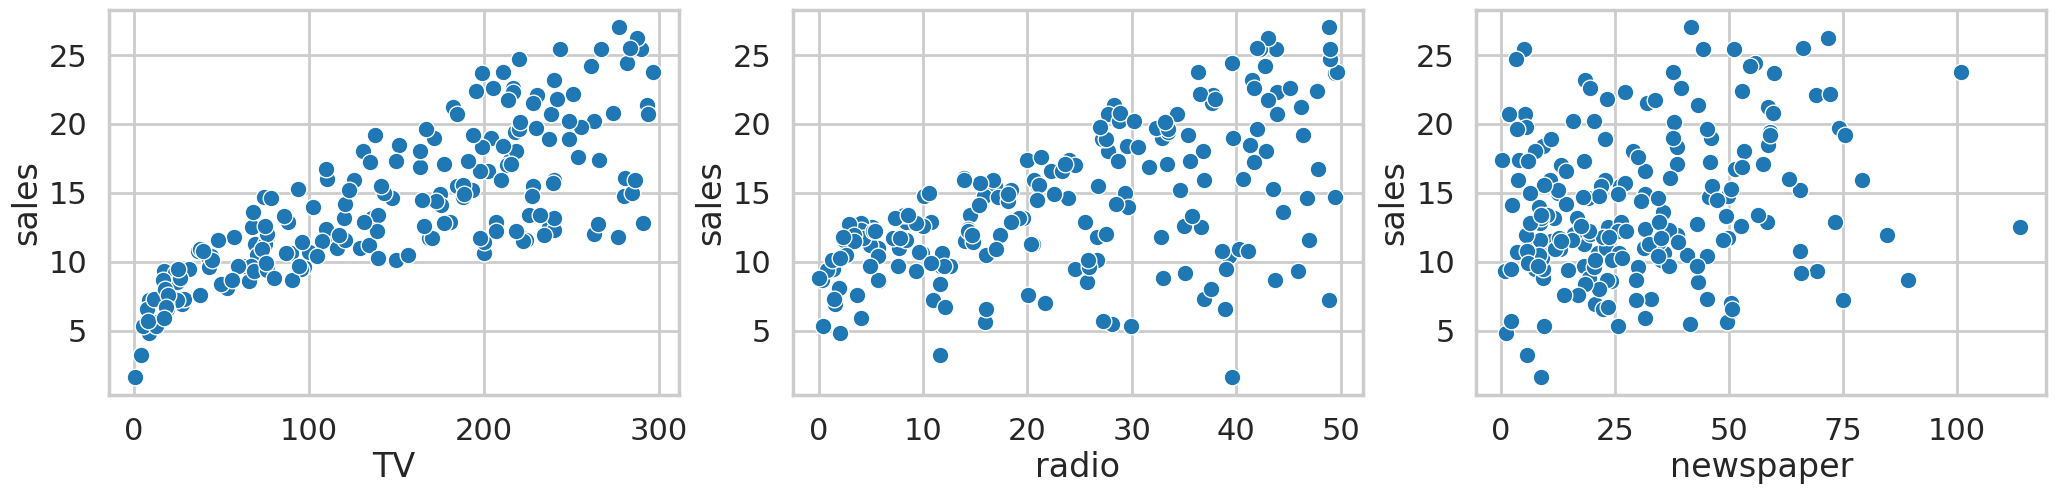

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(25,5))
for i, col in enumerate(["TV","radio","newspaper"]):
  sns.scatterplot(data=Adv,
                x=col,
                y="sales",
                ax=ax[i])


### Histograms
***


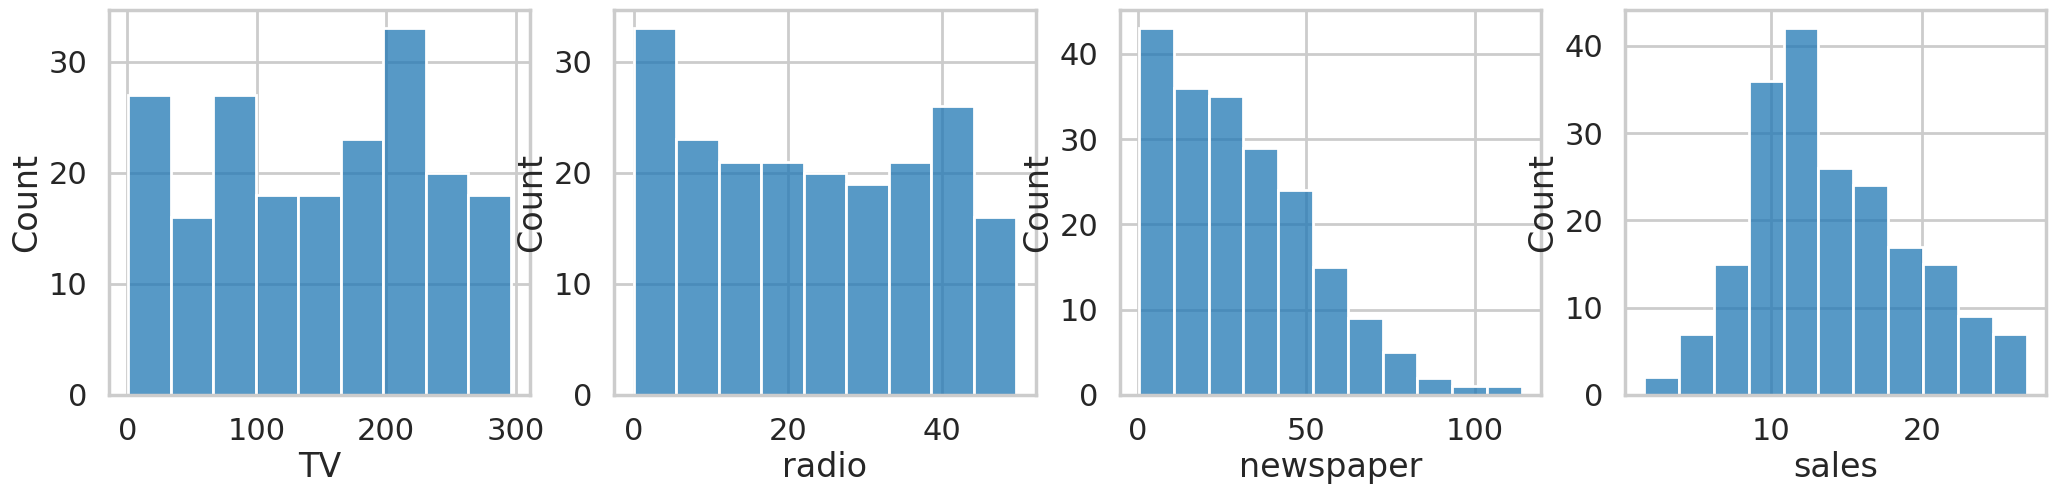

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(25,5))
for i, col in enumerate(["TV","radio","newspaper","sales"]):
  sns.histplot(data=Adv,
                x=col,
                ax=ax[i])


## Regression with Advertising and Credit data
***

Here,

$Y$ = sales (also called "target" variable in python)

In [2]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Multiple Regression
from statsmodels.base.model import Model
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
model = ols('sales~TV+radio+newspaper',Adv).fit()

print(model.summary())

print("Residual Standard Error is ", np.sqrt(model.mse_resid))

print("VIF scores")
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = Adv[['TV', 'radio', 'newspaper']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           1.58e-96
Time:                        15:28:54   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [ ]:
# Simple Regression TV
from statsmodels.base.model import Model
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
model = ols('sales~TV',Adv).fit()
print(model.summary())
print("Residual Standard Error is ", np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           1.47e-42
Time:                        15:30:33   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [ ]:
# Simple Regression radio
from statsmodels.base.model import Model
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
model = ols('sales~radio',Adv).fit()
print(model.summary())
print("Residual Standard Error is ", np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           4.35e-19
Time:                        15:32:04   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

In [ ]:
# Simple Regression newspaper
from statsmodels.base.model import Model
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
model = ols('sales~newspaper',Adv).fit()
print(model.summary())
print("Residual Standard Error is ", np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 06 Dec 2023   Prob (F-statistic):            0.00115
Time:                        15:33:13   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

Residual Analysis
count    2.000000e+02
mean     7.638334e-16
std      1.672757e+00
min     -8.827687e+00
25%     -8.908135e-01
50%      2.418018e-01
75%      1.189319e+00
max      2.829223e+00
dtype: float64


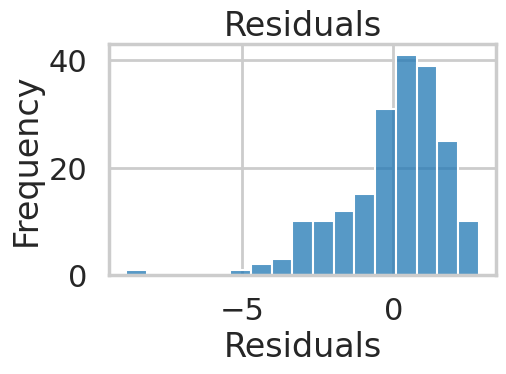

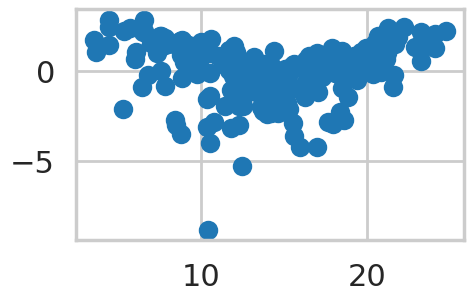

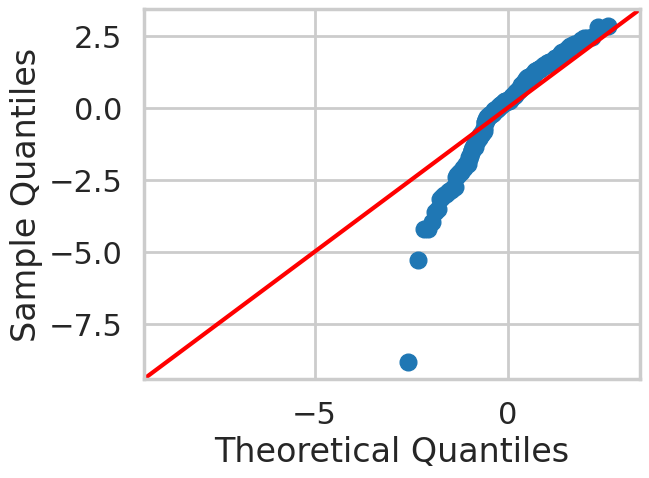

In [38]:
# Final Model with residual analysis

model = ols('sales~TV+radio+newspaper',Adv).fit()
residuals = Adv.sales - model.fittedvalues

print("Residual Analysis")
print(residuals.describe())

plt.figure(figsize=(5,3))
sns.histplot(residuals)
plt.title('Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(5,3))
plt.scatter(model.fittedvalues, residuals)
sm.qqplot(residuals, line='45')
plt.show()


In [55]:
# Exploring synergy

model = ols('sales~TV*radio',Adv).fit()
print(model.summary())
print("Residual Standard Error is ", np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          6.68e-146
Time:                        16:31:02   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

In [41]:
# Handling categorical features - demo using Credit dataset

Credit = pd.read_csv('Credit.csv')

In [43]:
Credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [46]:
credit_df = Credit[["Ethnicity", "Balance"]]
credit_df.head()

,Ethnicity,Balance
0,Caucasian,333
1,Asian,903
2,Asian,580
3,Asian,964
4,Caucasian,331


In [47]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ethnicity  400 non-null    object
 1   Balance    400 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ KB


In [48]:
dummies = []

cols = ['Ethnicity']

for col in cols:
   dummies.append(pd.get_dummies(df[col], drop_first=True))

dummies_df = pd.concat(dummies, axis=1)
credit_df = pd.concat((credit_df,dummies_df),axis=1)
credit_df.head()

,Ethnicity,Balance,Asian,Caucasian
0,Caucasian,333,0,1
1,Asian,903,1,0
2,Asian,580,1,0
3,Asian,964,1,0
4,Caucasian,331,0,1


In [52]:
model = ols('Balance~Asian+Caucasian',credit_df).fit()
print(model.summary())
print("Residual Standard Error is ", np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Wed, 06 Dec 2023   Prob (F-statistic):              0.957
Time:                        16:25:38   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    531.0000     46.319     11.464      0.0